# AC - Data Analysis

After joining all the different data from the several csv files, it is time to analyse and put into charts all the different info we have access to, in order to understand what kind of data we have in our hands.

Let's start by importing all the necessary libraries and the doc with all the static data.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

static_dataset = pd.read_csv("disp_cli_acc_dist.csv")

Let's start by checking the general stats of this dataset, such as number of columns, rows, data types, etc.

In [83]:
print("Number of rows: ", len(static_dataset.index))

print("Number of columns: ", len(static_dataset.columns))

Number of rows:  5369
Number of columns:  39


Let's take a closer look at the dataset's format and content, as well as some general statistics.

In [84]:
static_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 39 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   disp_id                                                            5369 non-null   int64  
 1   client_id                                                          5369 non-null   int64  
 2   account_id                                                         5369 non-null   int64  
 3   type                                                               5369 non-null   object 
 4   birth_number                                                       5369 non-null   int64  
 5   client_district_id                                                 5369 non-null   int64  
 6   client_district_name                                               5369 non-null   object 
 7   client_district_region  

In the output from the block below, some interesting statictical data can be seen. Namely, some of this data can be highlighted:

# TODO analizar os dados em baixo e destacar alguns deles 

In [85]:
static_dataset.describe()

,disp_id,client_id,account_id,birth_number,client_district_id,client_district_no. of inhabitants,client_district_no. of municipalities with inhabitants < 499,client_district_no. of municipalities with inhabitants 500-1999,client_district_no. of municipalities with inhabitants 2000-9999,client_district_no. of municipalities with inhabitants >10000,...,account_district_no. of municipalities with inhabitants < 499,account_district_no. of municipalities with inhabitants 500-1999,account_district_no. of municipalities with inhabitants 2000-9999,account_district_no. of municipalities with inhabitants >10000,account_district_no. of cities,account_district_ratio of urban inhabitants,account_district_average salary,account_district_unemploymant rate '96,account_district_no. of enterpreneurs per 1000 inhabitants,account_district_no. of commited crimes '96
count,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5.369000e+03,5369.000000,5369.000000,5369.000000,5369.000000,...,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,3337.097970,3359.011920,2767.496927,535114.970013,37.310114,2.692806e+05,39.630844,20.739616,5.483144,1.709071,...,39.407897,20.897374,5.515366,1.720805,5.516111,69.288750,9519.221643,3.489078,121.235053,16483.837772
std,2770.418826,2832.911984,2307.843630,172895.618429,25.043690,3.590500e+05,34.462701,15.190457,4.369373,1.075535,...,34.290870,15.292543,4.402339,1.082003,2.919015,19.831079,1332.240589,2.131257,23.218265,31481.793856
min,1.000000,1.000000,1.000000,110820.000000,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.430000,81.000000,888.000000
25%,1418.000000,1418.000000,1178.000000,406009.000000,14.000000,8.888400e+04,8.000000,10.000000,2.000000,1.000000,...,8.000000,10.000000,2.000000,1.000000,4.000000,52.700000,8547.000000,1.960000,105.000000,2305.000000
50%,2839.000000,2839.000000,2349.000000,540829.000000,38.000000,1.219470e+05,34.000000,21.000000,5.000000,1.000000,...,34.000000,21.000000,5.000000,1.000000,6.000000,63.100000,8991.000000,3.470000,116.000000,3868.000000
75%,4257.000000,4257.000000,3526.000000,681013.000000,60.000000,2.261220e+05,65.000000,30.000000,7.000000,2.000000,...,65.000000,30.000000,7.000000,2.000000,7.000000,85.600000,9897.000000,4.790000,132.000000,6295.000000
max,13690.000000,13998.000000,11382.000000,875927.000000,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,...,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,9.400000,167.000000,99107.000000


In order to evaluate better the column datatypes, it is important to guarantee that all missing values are replaced as to keep the data type integrity of the columns. There are missing values that come up as '?' and they will be replaced by '0' in int and float columns, namely the columns related to unemployment rate and number of commited crimes per district, so that the evaluation of the column type comes up true.

In [86]:

static_dataset["client_district_unemploymant rate '95"] = static_dataset["client_district_unemploymant rate '95"].replace(
    "?", 0.0)

static_dataset["client_district_no. of commited crimes '95"] = static_dataset["client_district_no. of commited crimes '95"].replace(
    "?", 0)

static_dataset["account_district_unemploymant rate '95"] = static_dataset["account_district_unemploymant rate '95"].replace("?", 0.0)

static_dataset["account_district_no. of commited crimes '95"] = static_dataset["account_district_no. of commited crimes '95"].replace(
    "?", 0)


In [87]:
print(static_dataset.dtypes)
#TODO: fix types

disp_id                                                                int64
client_id                                                              int64
account_id                                                             int64
type                                                                  object
birth_number                                                           int64
client_district_id                                                     int64
client_district_name                                                  object
client_district_region                                                object
client_district_no. of inhabitants                                     int64
client_district_no. of municipalities with inhabitants < 499           int64
client_district_no. of municipalities with inhabitants 500-1999        int64
client_district_no. of municipalities with inhabitants 2000-9999       int64
client_district_no. of municipalities with inhabitants >10000          int64

## Data Distribution

Let's start by analyzing the data distribution in the several columns. It makes sense to plot charts for each and every data attribute. 
The counters and ID don't have much distribuition analysis to do because these columns are mere increasing values with not much correlation. to its variance. However the other columns might give us some insteresting data.

### Column 'Type'

<AxesSubplot:>

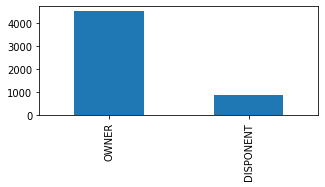

In [88]:
static_dataset['type'].value_counts().plot(kind='bar', figsize=(5, 2))

### Column "Birth Number"

TODO: get client distribution over birth years, the rest is irrelevant

### Column "Client District ID"

<AxesSubplot:>

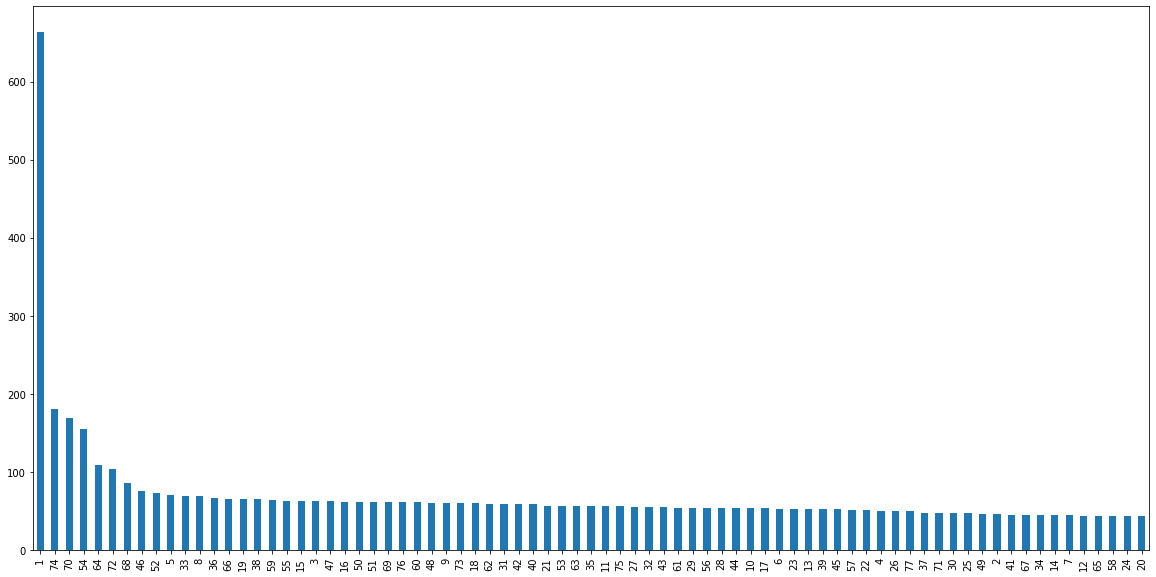

In [89]:
static_dataset['client_district_id'].value_counts().plot(kind='bar', figsize=(20, 10))

### Column "Account District ID"

Comparing to the chart above, we can see that the second and third districts, where most clients and accounts are associated to, switch with each other, making it clear that not all accounts are located in the same district as the client's. There is a clear tendency for clients and accounts to be located in district with ID 1, with over 600 occurences just in that district, followed by the second district which only has almost 200 occurences associated.

<AxesSubplot:>

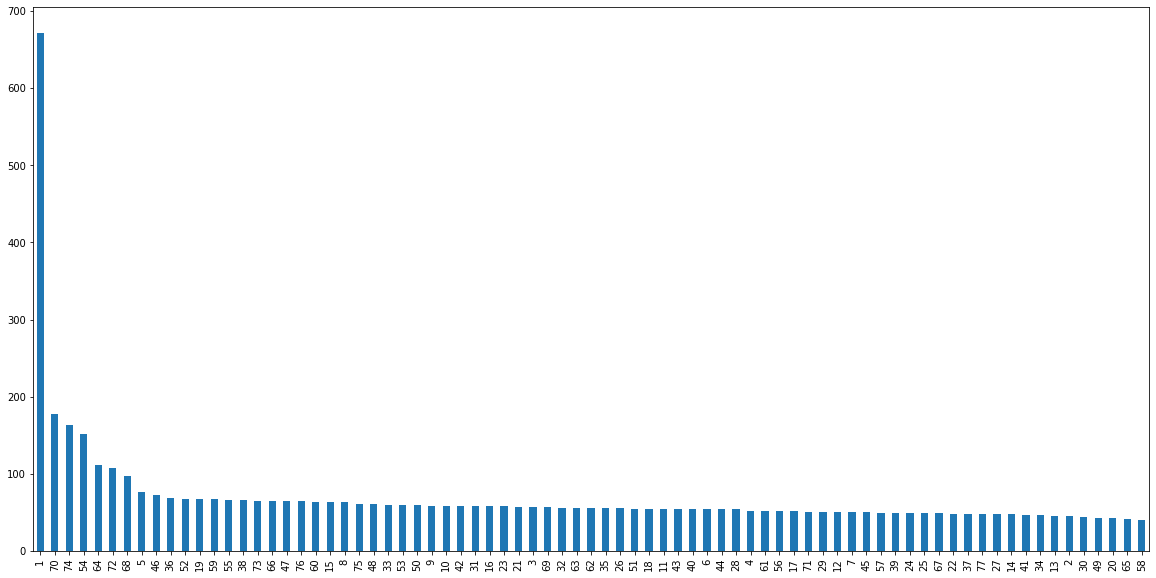

In [90]:
static_dataset['account_district_id'].value_counts().plot(
    kind='bar', figsize=(20, 10))


### Column "Client District Name"

<AxesSubplot:>

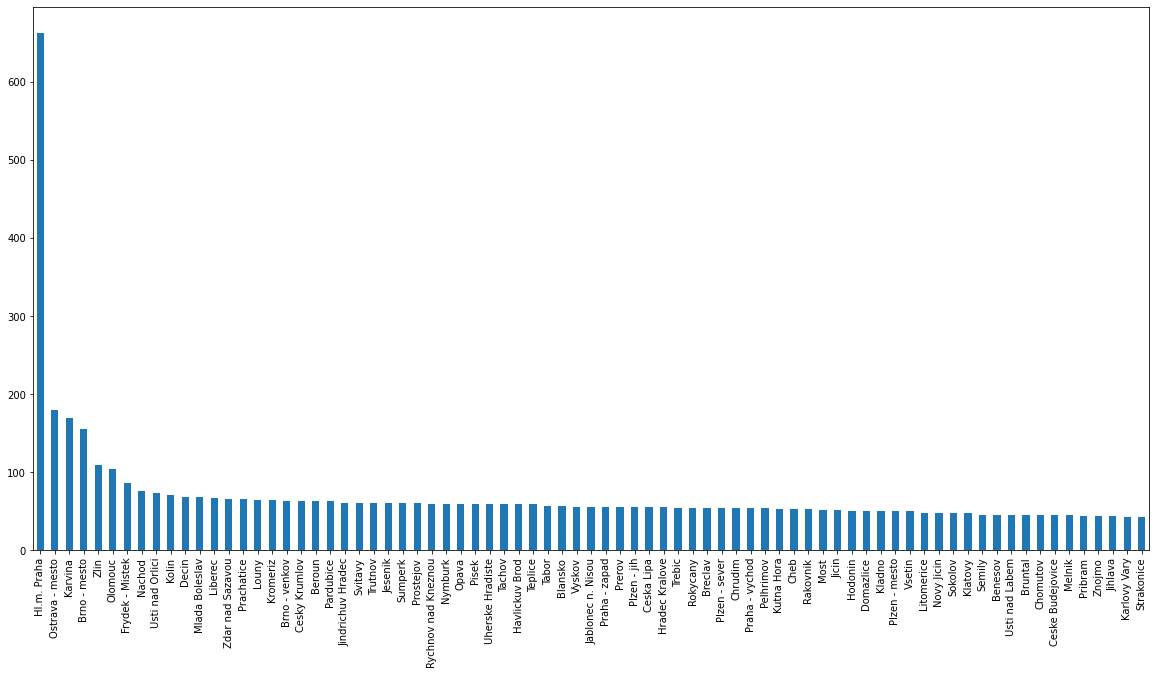

In [91]:
static_dataset['client_district_name'].value_counts().plot(
    kind='bar', figsize=(20, 10))

### Column "Account District Name"

<AxesSubplot:>

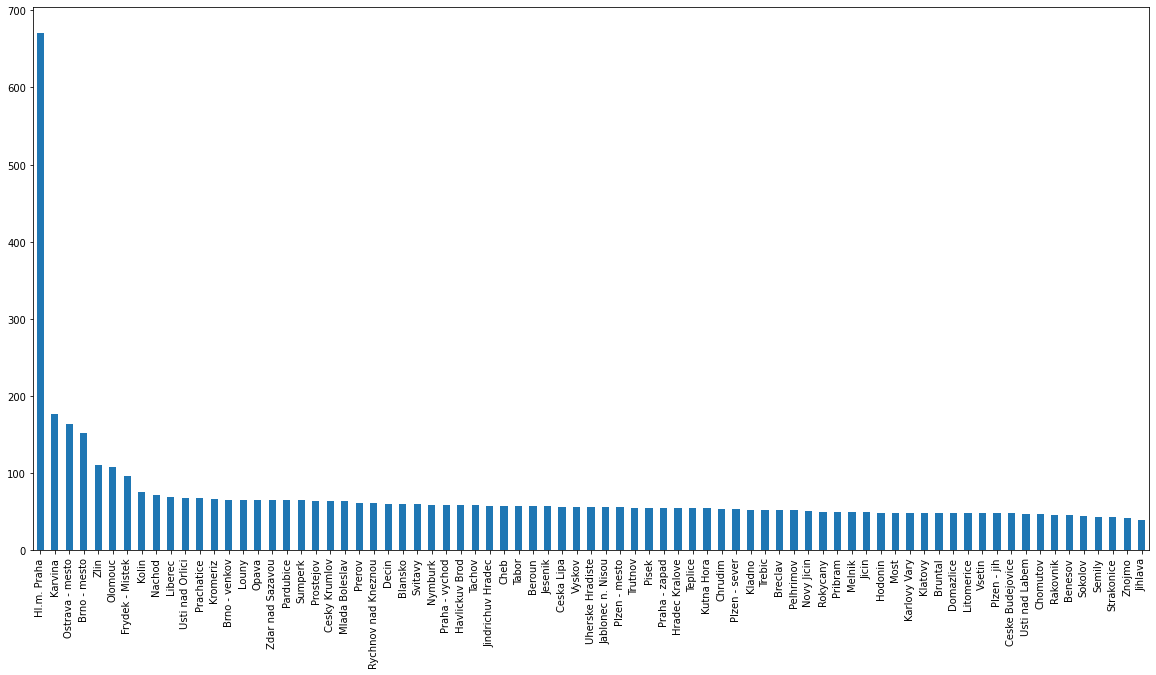

In [92]:
static_dataset['account_district_name'].value_counts().plot(
    kind='bar', figsize=(20, 10))


### Column "Client District Region"

<AxesSubplot:>

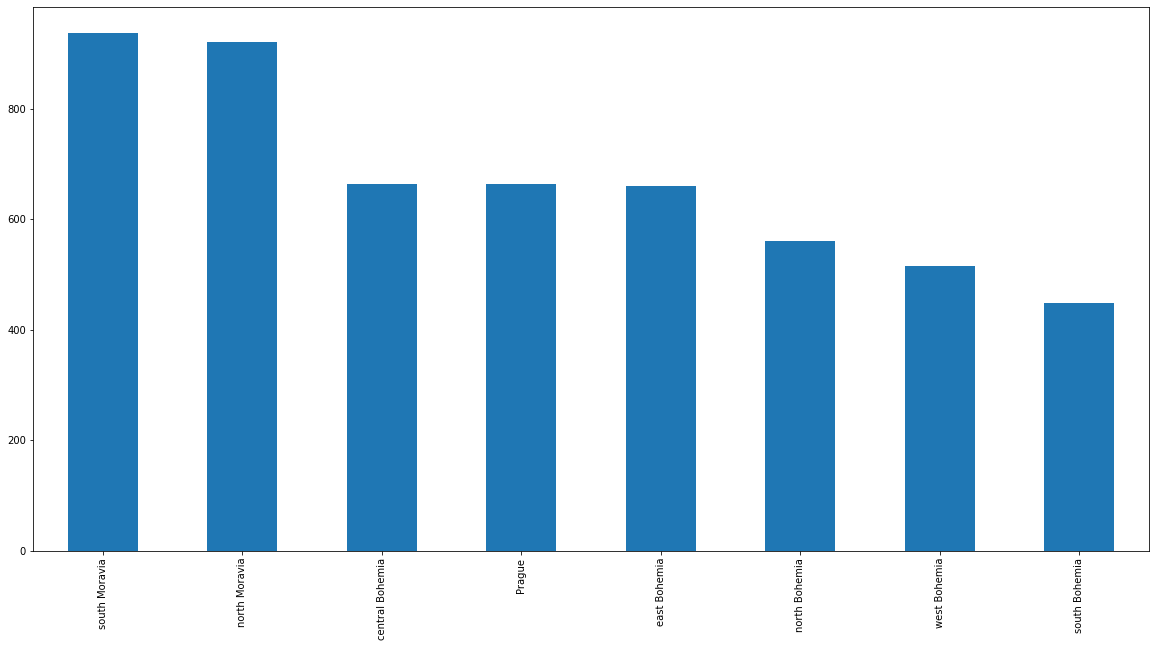

In [93]:
static_dataset['client_district_region'].value_counts().plot(
    kind='bar', figsize=(20, 10))


### Column "Account District Region"

TODO: comparar gráficos de regiões clientes/accounts!!

<AxesSubplot:>

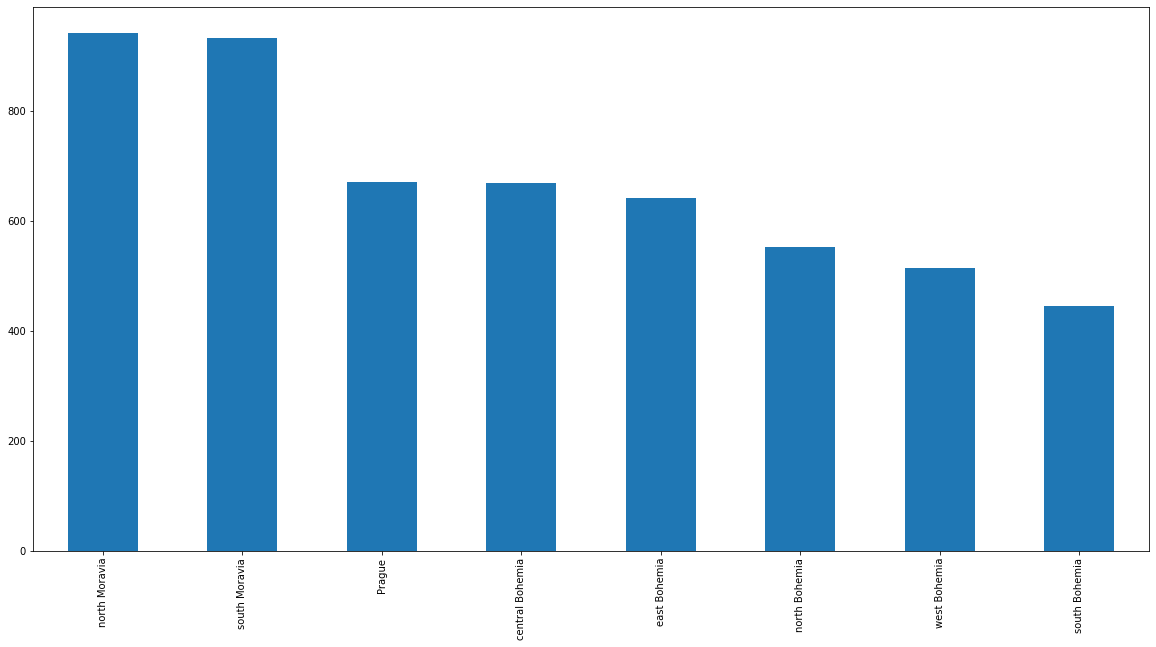

In [94]:
static_dataset['account_district_region'].value_counts().plot(
    kind='bar', figsize=(20, 10))

### Column "Client District No. of Inhabitants"

<AxesSubplot:>

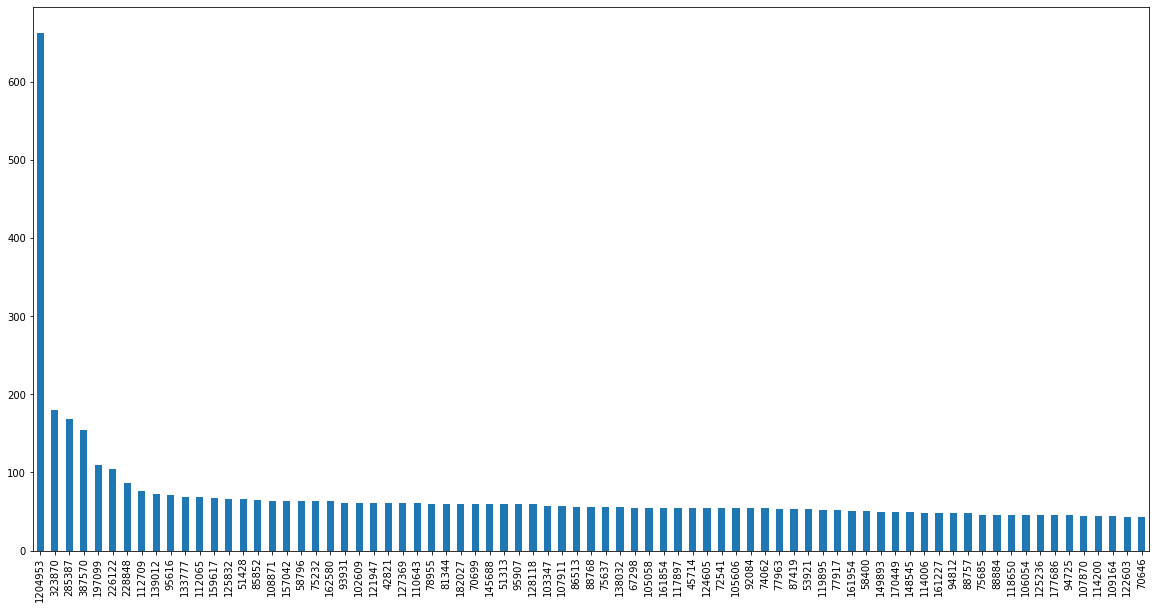

In [95]:
static_dataset['client_district_no. of inhabitants'].value_counts().plot(
    kind='bar', figsize=(20, 10))

    #FIXME: change by distribution on intervals of inhabitants

### Column "Account District No. of Inhabitants"

<AxesSubplot:>

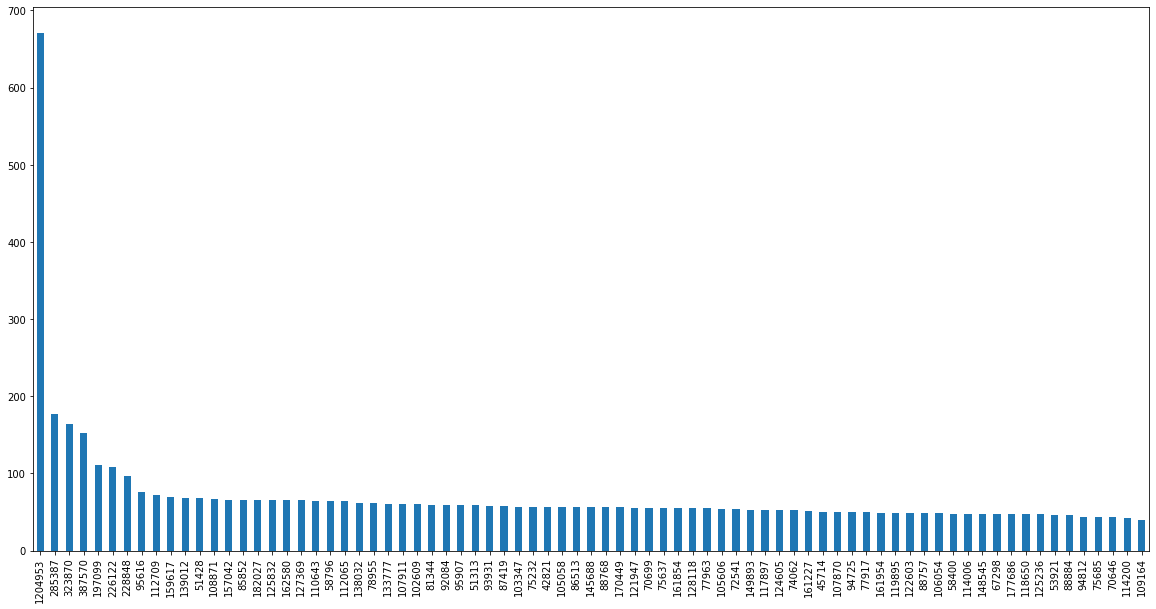

In [96]:
static_dataset['account_district_no. of inhabitants'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: change by distribution on intervals of inhabitants


### Column "Client District Number of Municipalities with less than 499 inhabitants"

<AxesSubplot:>

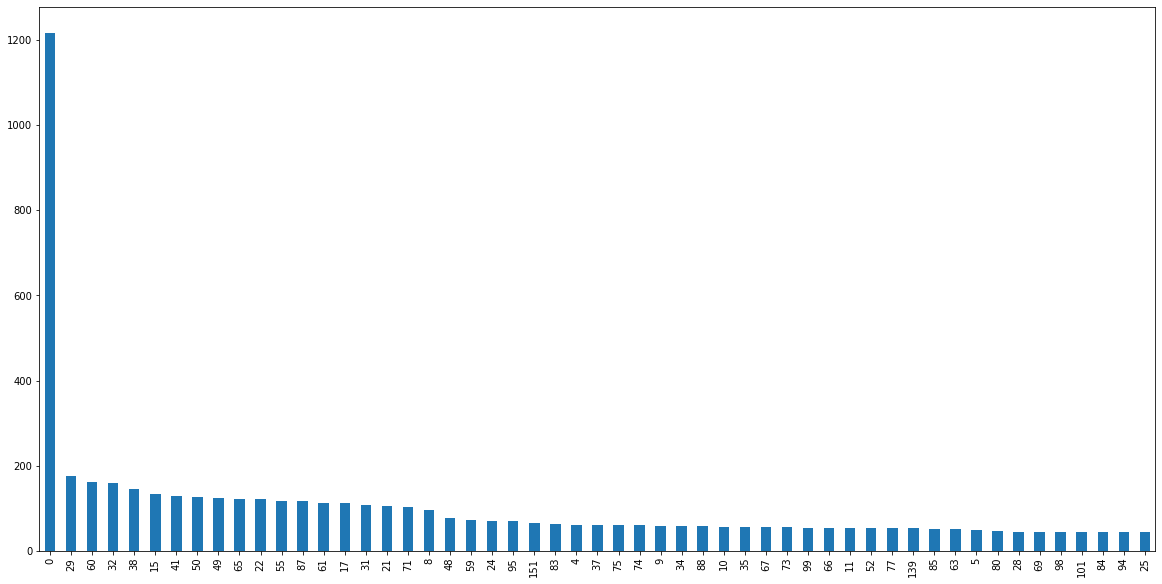

In [97]:
static_dataset['client_district_no. of municipalities with inhabitants < 499'].value_counts().plot(
    kind='bar', figsize=(20, 10))

    #FIXME: meter intervalos no x como no anterior


### Column "Account District Number of Municipalities with less than 499 inhabitants"

<AxesSubplot:>

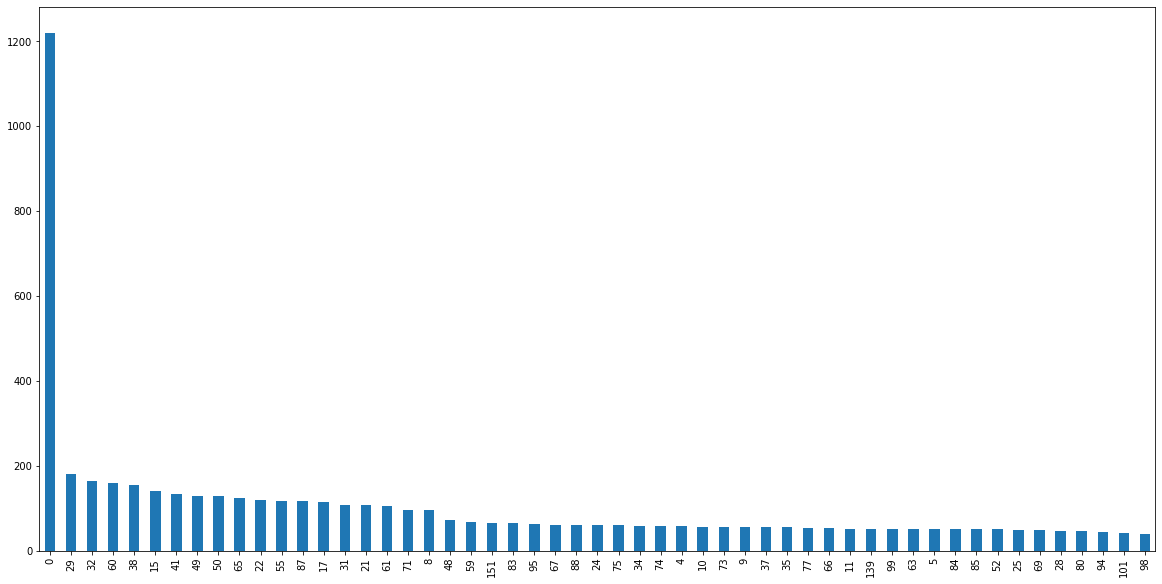

In [98]:
static_dataset['account_district_no. of municipalities with inhabitants < 499'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: meter intervalos no x como no anterior


### Column "Client District Number of Municipalities with number of inhabitants between 500 and 1999"

<AxesSubplot:>

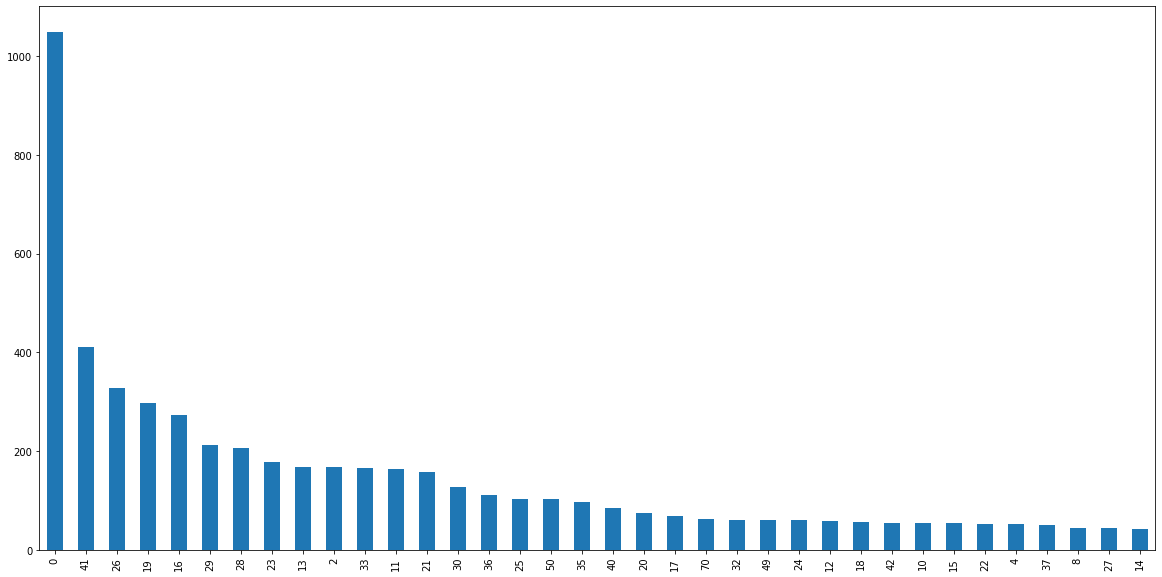

In [99]:
static_dataset['client_district_no. of municipalities with inhabitants 500-1999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

    #FIXME: same as before


### Column "Account District Number of Municipalities with number of inhabitants between 500 and 1999"

<AxesSubplot:>

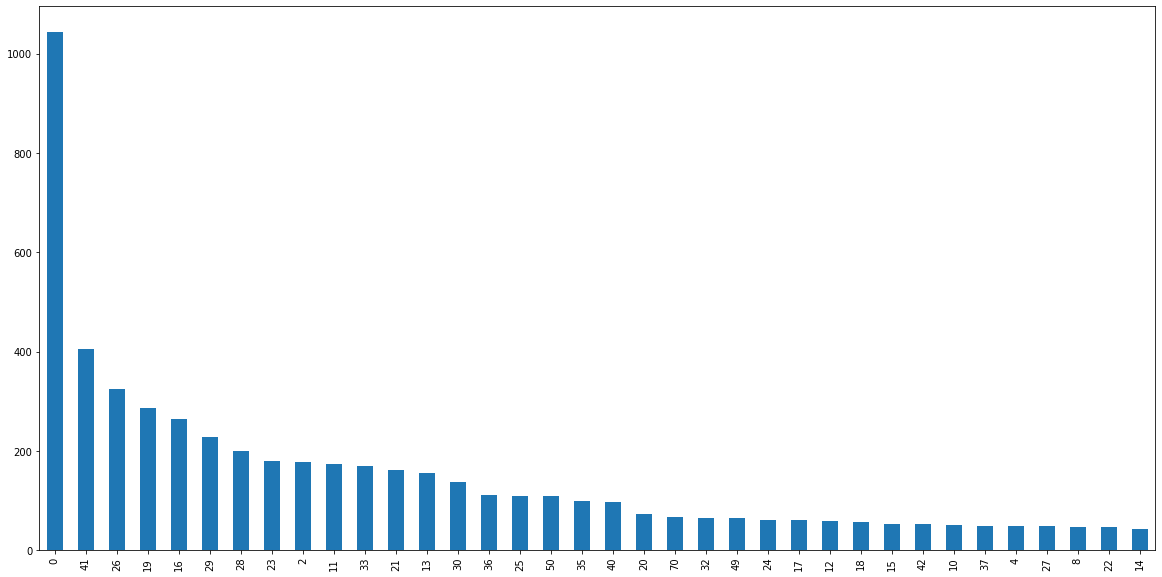

In [100]:
static_dataset['account_district_no. of municipalities with inhabitants 500-1999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before


### Column "Client District Number of Municipalities with number of inhabitants between 2000 and 9999"

<AxesSubplot:>

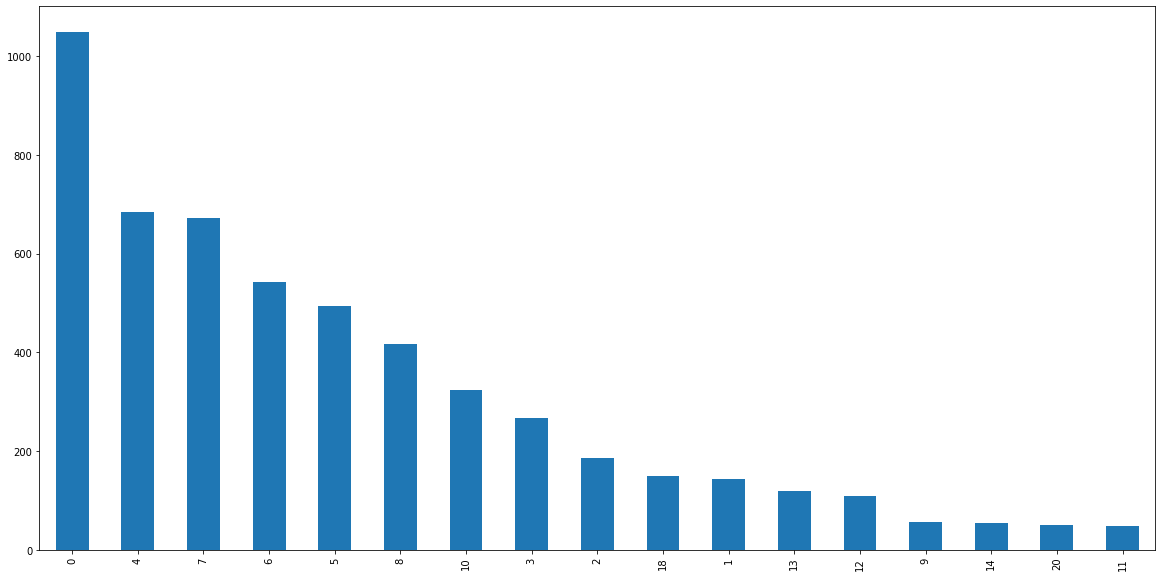

In [101]:
static_dataset['client_district_no. of municipalities with inhabitants 2000-9999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before

### Column "Account District Number of Municipalities with number of inhabitants between 2000 and 9999"

<AxesSubplot:>

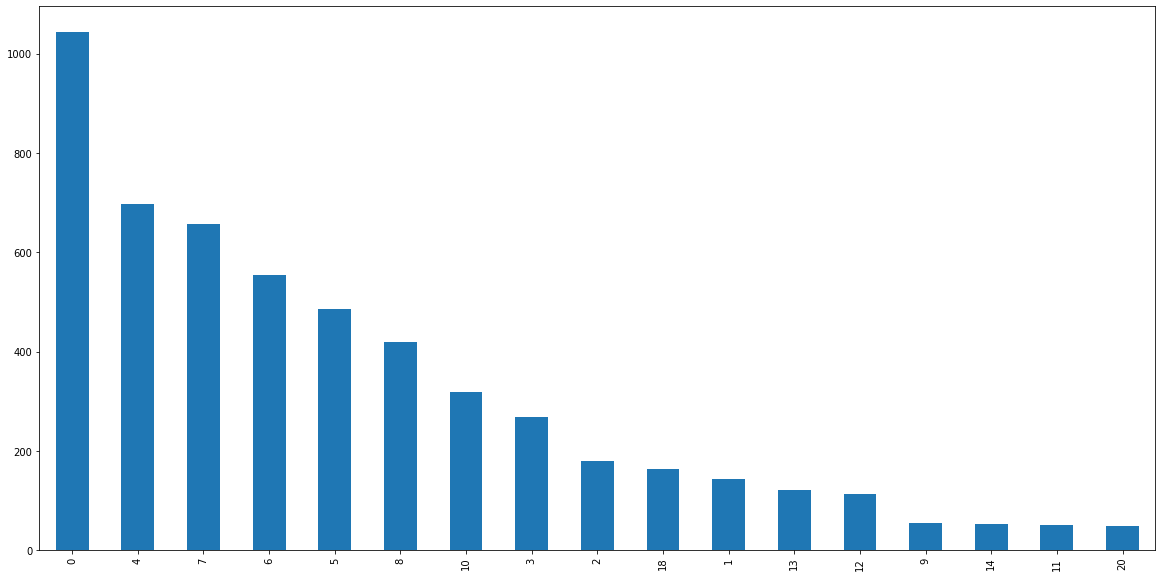

In [102]:
static_dataset['account_district_no. of municipalities with inhabitants 2000-9999'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before

### Column "Client District Number of Municipalities with more than 10000 inhabitants"

<AxesSubplot:>

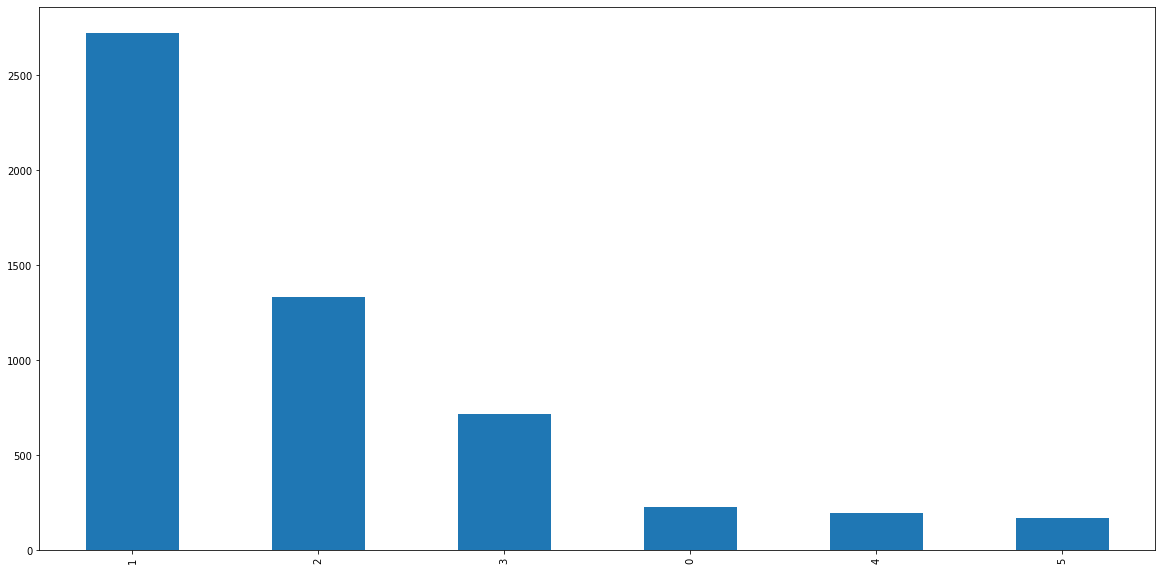

In [103]:
static_dataset['client_district_no. of municipalities with inhabitants >10000'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before


### Column "Account District Number of Municipalities with more than 10000 inhabitants"

<AxesSubplot:>

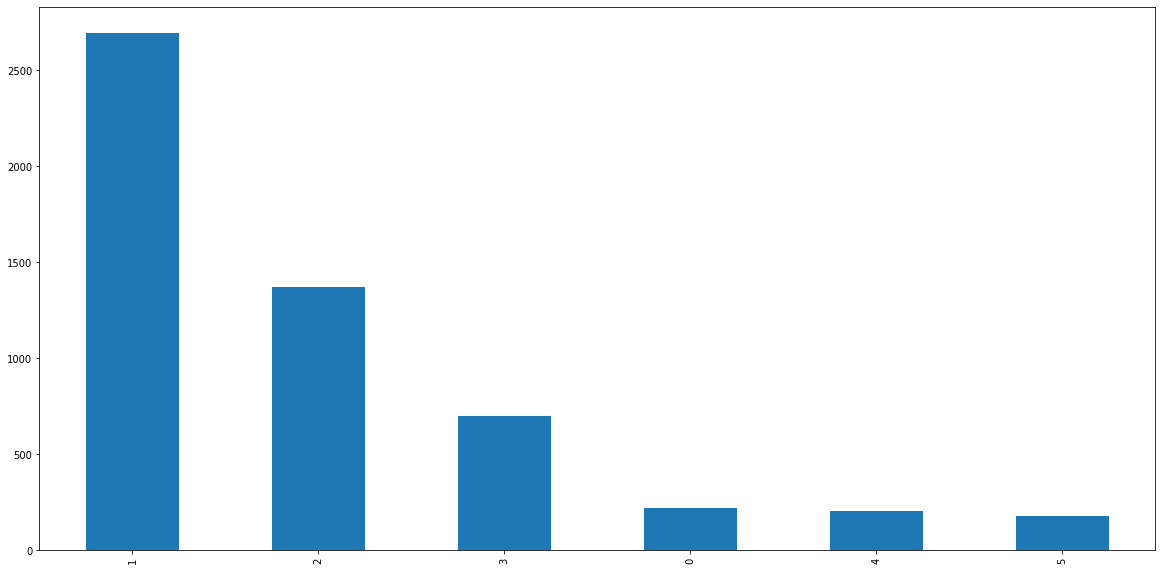

In [104]:
static_dataset['account_district_no. of municipalities with inhabitants >10000'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: same as before

### Column "Client District Number of Cities"

<AxesSubplot:>

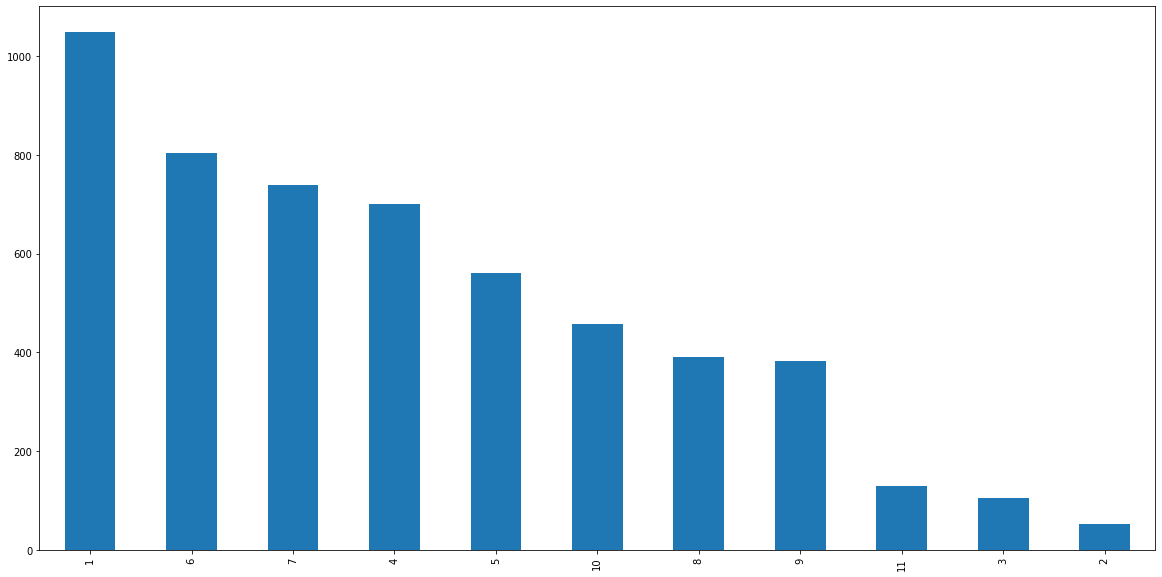

In [105]:
static_dataset['client_district_no. of cities'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME put names in axis, provide explanation to graph

### Column "Account District Number of Cities"

<AxesSubplot:>

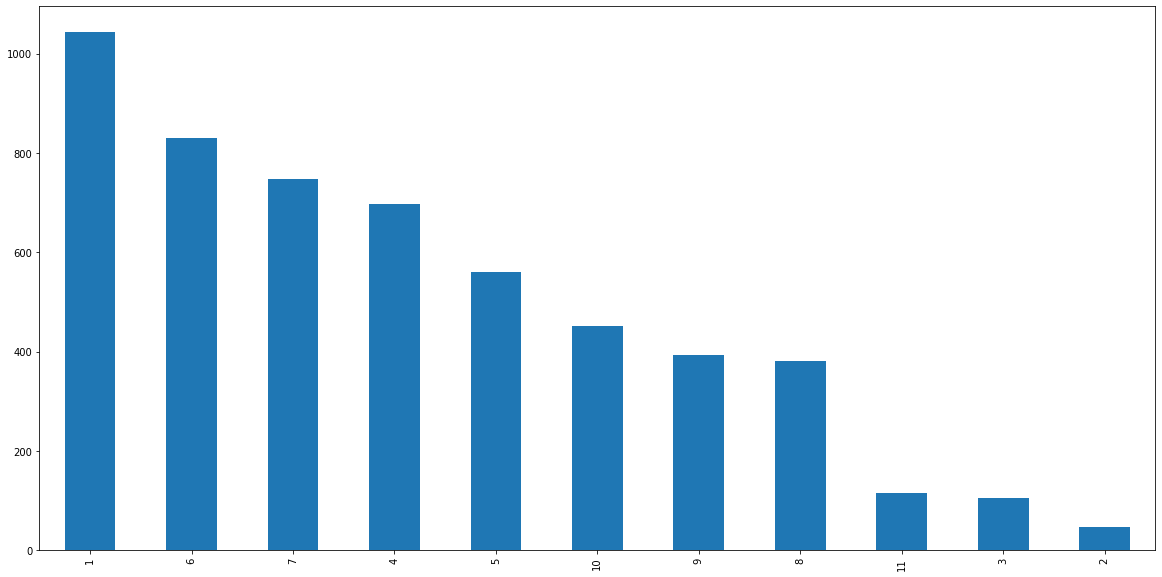

In [106]:
static_dataset['account_district_no. of cities'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME put names in axis, provide explanation to graph


### Column "Client District Ratio of Urban Inhabitants"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='client_district_ratio of urban inhabitants', ylabel='Density'>

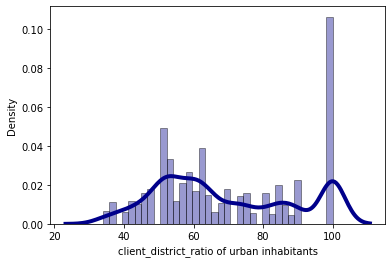

In [107]:
sns.distplot(static_dataset['client_district_ratio of urban inhabitants'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})


### Column "Account District Ratio of Urban Inhabitants"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='account_district_ratio of urban inhabitants', ylabel='Density'>

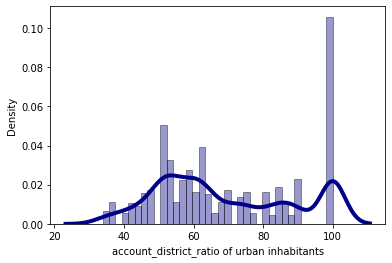

In [108]:
sns.distplot(static_dataset['account_district_ratio of urban inhabitants'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})


### Column "Client District Average Salary"

<AxesSubplot:>

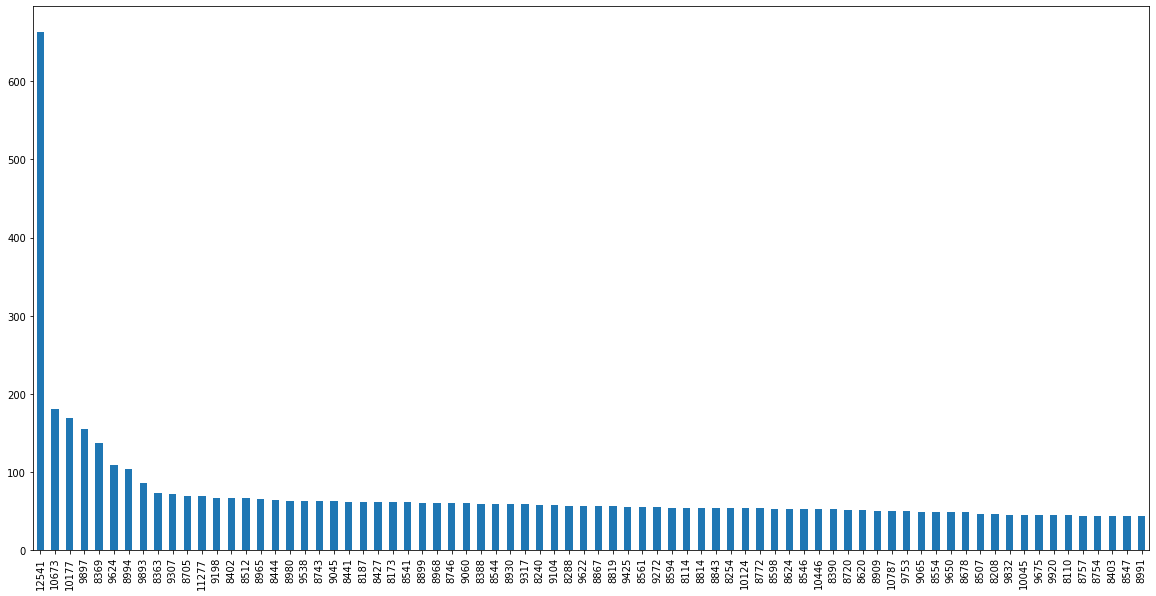

In [109]:
static_dataset['client_district_average salary'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: meter intervalos no x


### Column "Account District Average Salary"

<AxesSubplot:>

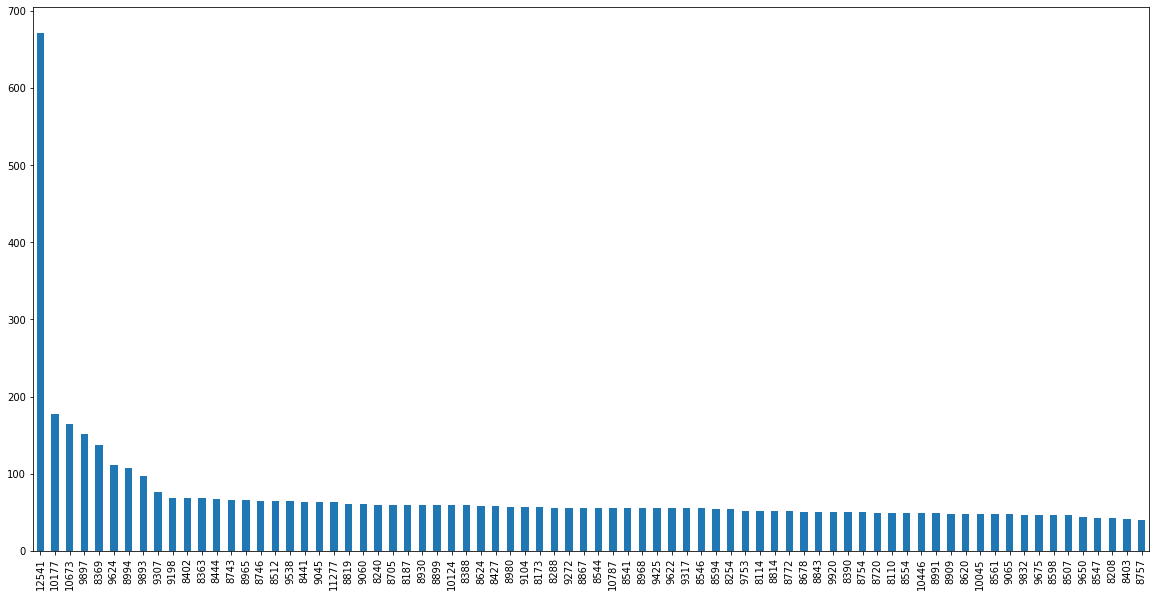

In [110]:
static_dataset['account_district_average salary'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: meter intervalos no x

### Column "Client District Unemployment Rate '95"

There is a clear tendency in the value 0.29, in other words, more clients live in districts whose unemployment rate in '95 was around 0.29. 

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_unemploymant rate '95", ylabel='Density'>

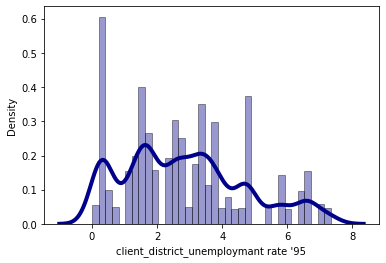

In [111]:
sns.distplot(static_dataset['client_district_unemploymant rate \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})


### Column "Account District Unemployment Rate '95"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_unemploymant rate '95", ylabel='Density'>

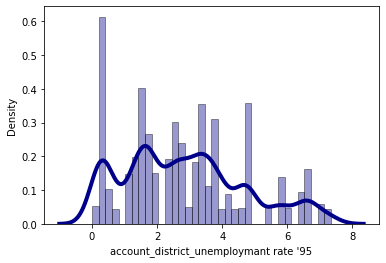

In [112]:
sns.distplot(static_dataset['account_district_unemploymant rate \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

### Column "Client District Unemployment Rate '96"


C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_unemploymant rate '96", ylabel='Density'>

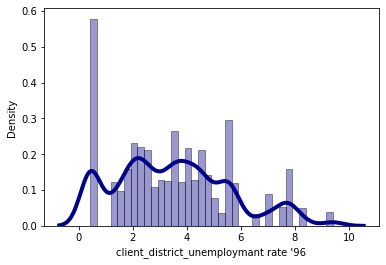

In [113]:
sns.distplot(static_dataset['client_district_unemploymant rate \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

### Column "Account District Unemployment Rate '96"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_unemploymant rate '96", ylabel='Density'>

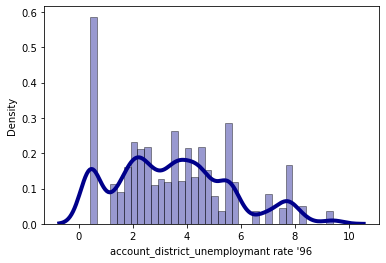

In [114]:
sns.distplot(static_dataset['account_district_unemploymant rate \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

### Column "Client District Number of Enterpreneours per 1000 Inhabitants" 

<AxesSubplot:>

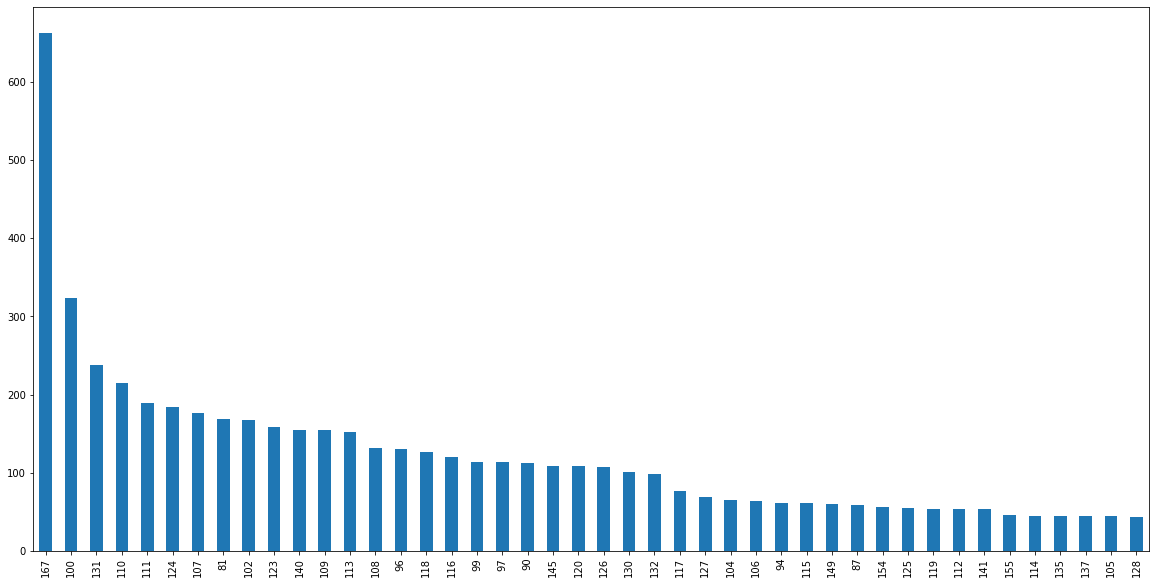

In [115]:
static_dataset['client_district_no. of enterpreneurs per 1000 inhabitants'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: you know the deal

### Column "Account District Number of Enterpreneours per 1000 Inhabitants" 

<AxesSubplot:>

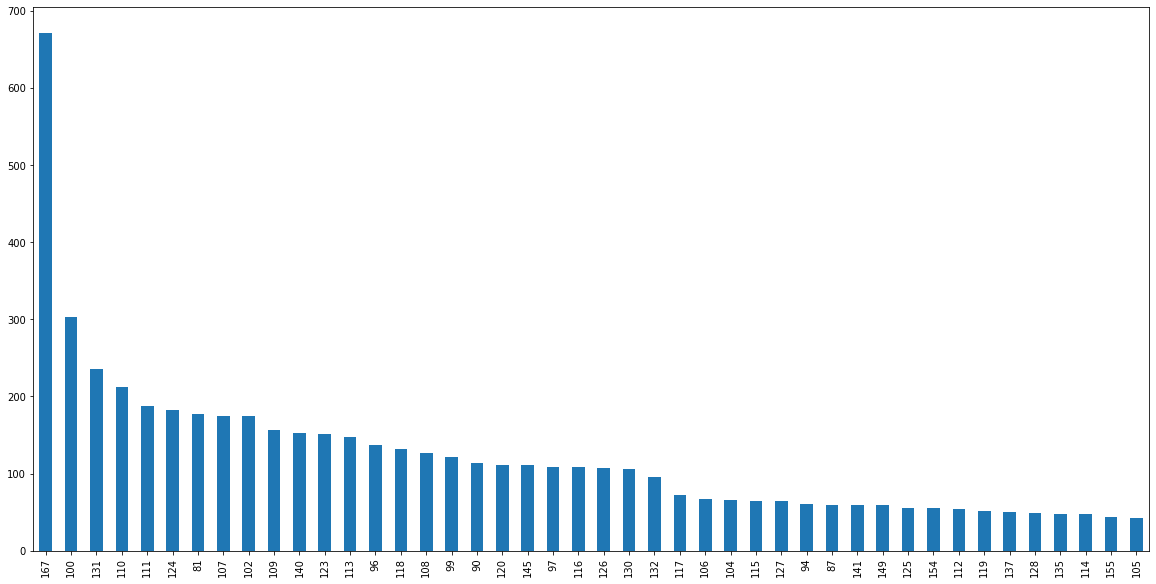

In [116]:
static_dataset['account_district_no. of enterpreneurs per 1000 inhabitants'].value_counts().plot(
    kind='bar', figsize=(20, 10))

#FIXME: you know the deal

### Column "Client District Number of Commited Crimes '95"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_no. of commited crimes '95", ylabel='Density'>

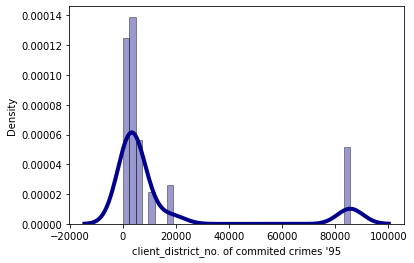

In [117]:
sns.distplot(static_dataset['client_district_no. of commited crimes \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 95

### Column "Account District Number of Commited Crimes '95"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_no. of commited crimes '95", ylabel='Density'>

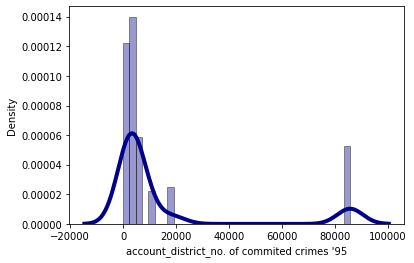

In [118]:
sns.distplot(static_dataset['account_district_no. of commited crimes \'95'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 95

### Column "Client District Number of Commited Crimes '96"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="client_district_no. of commited crimes '96", ylabel='Density'>

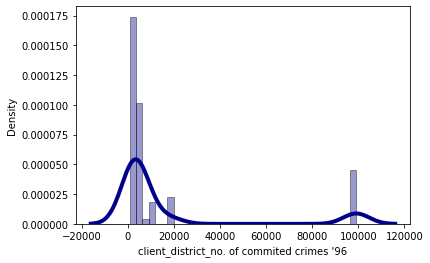

In [119]:
sns.distplot(static_dataset['client_district_no. of commited crimes \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 96 again uwu


### Column "Account District Number of Commited Crimes '96"

C:\Users\shit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="account_district_no. of commited crimes '96", ylabel='Density'>

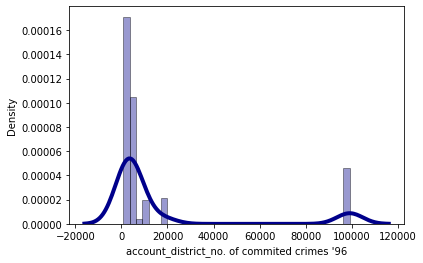

In [120]:
sns.distplot(static_dataset['account_district_no. of commited crimes \'96'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

#FIXME: this chart isn't right at all, find better way of showing the distribution of clients per district with number of commited crimes in 96 again uwu

### Column "Account Frequency"

<AxesSubplot:>

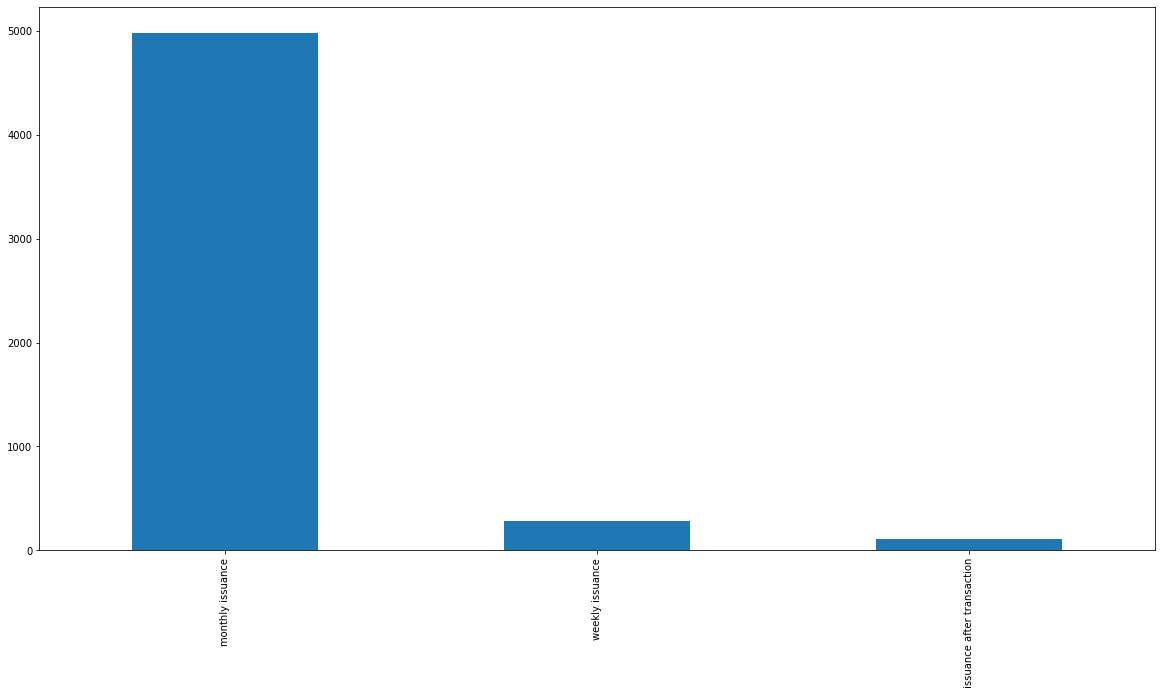

In [121]:
static_dataset['frequency'].value_counts().plot(
    kind='bar', figsize=(20, 10))

### Column "Account Date"

In [122]:
#TODO: get years of date and make graph with years

## Data Correlation

Some of these columns are highly correlated to each other, some patterns even existing between each other. A good way of checking this is by looking at the &&& matrix and check which of the columns have a higher correlation rate. Some important takeaways from this chart are:

# TODO: study chart and state the most important correlations

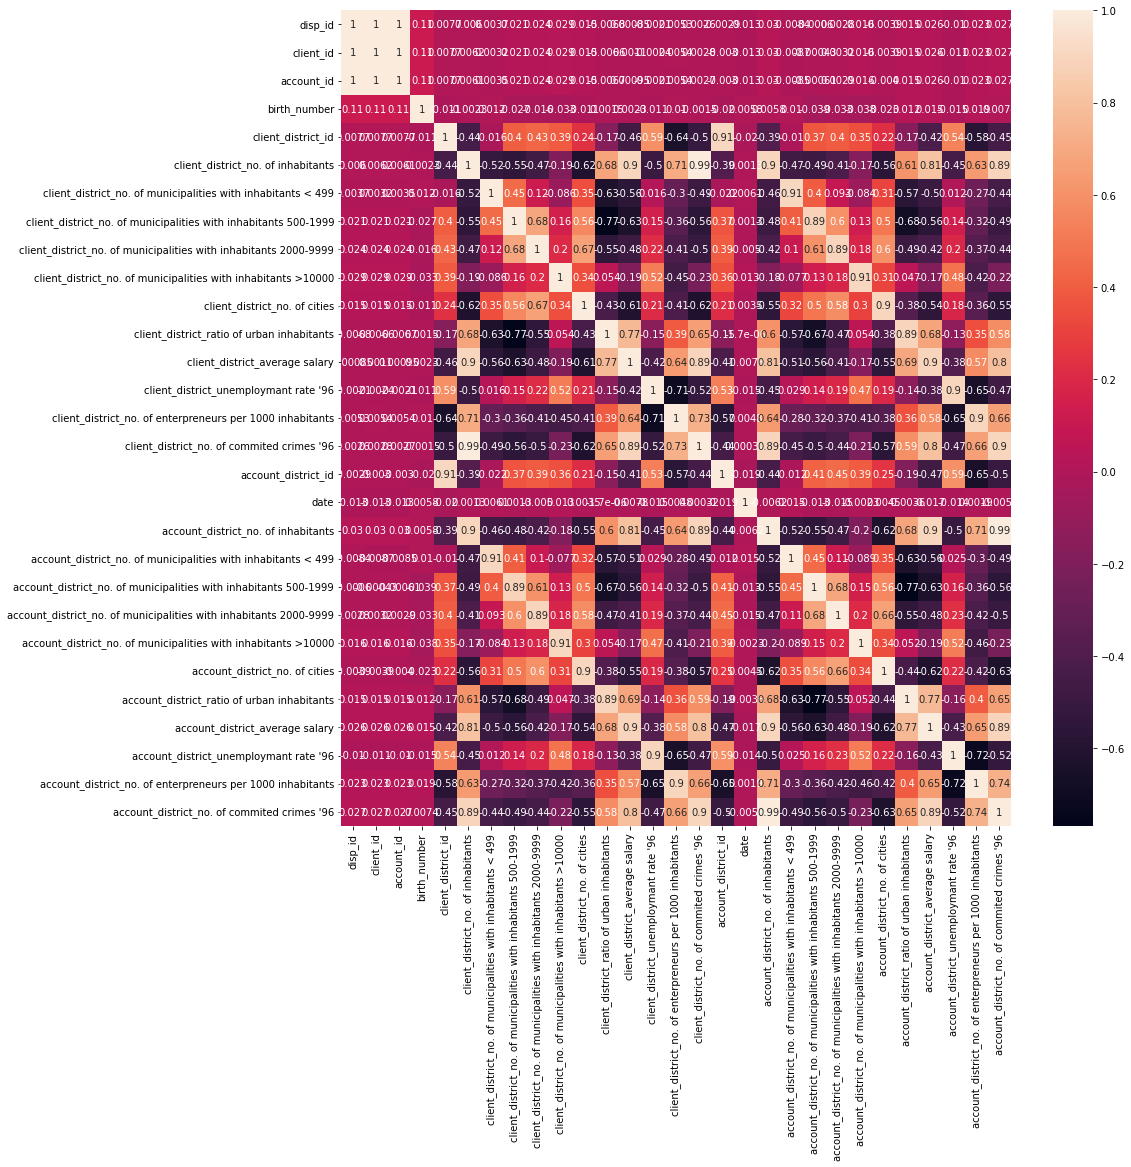

In [124]:
corrmat = static_dataset.corr()
f, ax = plt.subplots(figsize=(15, 15))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, square=False, annot=True)
plt.show()